#Data

In [1]:
import gdown
#2019
google_drive_url_test = "https://drive.google.com/uc?id=1VnHjGVS7gufCQM4UyhzOVv83CeCfyzI9"

# Đường dẫn đến nơi lưu trữ file trên Kaggle
output_path_test = "data_test.csv"

# Tải file từ Google Drive
gdown.download(google_drive_url_test, output_path_test, quiet=False)

#Predict GWR
google_drive_url_gwr = "https://drive.google.com/uc?id=1gBLbYZqszZc6k0HLyQdMDf9nH54f44E_"

# Đường dẫn đến nơi lưu trữ file trên Kaggle
output_path_gwr = "predict_gwr.csv"

# Tải file từ Google Drive
gdown.download(google_drive_url_gwr, output_path_gwr, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1VnHjGVS7gufCQM4UyhzOVv83CeCfyzI9
To: /content/data_test.csv
100%|██████████| 3.26M/3.26M [00:00<00:00, 123MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gBLbYZqszZc6k0HLyQdMDf9nH54f44E_
To: /content/predict_gwr.csv
100%|██████████| 1.14M/1.14M [00:00<00:00, 115MB/s]


'predict_gwr.csv'

In [3]:
#Predict step
google_drive_url_step = "https://drive.google.com/uc?id=1e_B4PCxoNhn2JdAqTwZKpbjy5S_wFAGK"
# Đường dẫn đến nơi lưu trữ file
output_path_step = "predict_step.csv"

# Tải file từ Google Drive
gdown.download(google_drive_url_step, output_path_step, quiet=False)

#Predict random forest
google_drive_url_rf = "https://drive.google.com/uc?id=1y8mnD2CgqR-fq6kJtczVDEW_w-hSGY6a"
# Đường dẫn đến nơi lưu trữ file
output_path_rf = "predict_rf.csv"

# Tải file từ Google Drive
gdown.download(google_drive_url_rf, output_path_rf, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1e_B4PCxoNhn2JdAqTwZKpbjy5S_wFAGK
To: /content/predict_step.csv
100%|██████████| 669k/669k [00:00<00:00, 34.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1y8mnD2CgqR-fq6kJtczVDEW_w-hSGY6a
To: /content/predict_rf.csv
100%|██████████| 1.23M/1.23M [00:00<00:00, 89.2MB/s]


'predict_rf.csv'

##Dataframe for actual and predict results

In [7]:
import pandas as pd

# Đọc tệp CSV và tạo DataFrame
df_gwr = pd.read_csv(output_path_gwr)

df_gwr['Predicted AWS'] = df_gwr['Predicted AWS'].apply(lambda x: 0 if x < 0 else x)
df_gwr = df_gwr.rename(columns={'Predicted AWS': 'GWR'})

df_gwr = df_gwr['GWR']

# Hiển thị df_gwr
print(df_gwr)


0        3.128090
1        1.714085
2        0.000000
3        0.574374
4        0.683617
           ...   
39995    2.388714
39996    2.535230
39997    2.831382
39998    2.485089
39999    0.761000
Name: GWR, Length: 40000, dtype: float64


In [8]:
import pandas as pd

# Đọc tệp CSV và tạo DataFrame
df_step = pd.read_csv(output_path_step)

df_step = df_step.rename(columns={'y_pred': 'STEP'})


# Hiển thị df_gwr
print(df_step)

           STEP
0      1.681039
1      0.000000
2      0.989582
3      0.000000
4      1.733531
...         ...
39995  2.063154
39996  1.978540
39997  2.152449
39998  1.829733
39999  0.857034

[40000 rows x 1 columns]


In [9]:
import pandas as pd

# Đọc tệp CSV và tạo DataFrame
df_rf = pd.read_csv(output_path_rf)

df_rf = df_rf.rename(columns={'Predicted': 'RF'})
df_rf = df_rf['RF']

# Hiển thị df_gwr
print(df_rf)

0        0.316333
1        0.045000
2        0.047810
3        0.372083
4        0.439690
           ...   
39995    1.170952
39996    2.727000
39997    4.415500
39998    1.978167
39999    0.256500
Name: RF, Length: 40000, dtype: float64


In [10]:
import pandas as pd

# Đọc tệp CSV và tạo DataFrame
df_test = pd.read_csv(output_path_test)

# Tạo DataFrame mới chỉ gồm các cột mong muốn
columns_to_keep = ['name', 'Row Position', 'Column Position', 'AWS', 'Imerg', 'DEM']
df_new = df_test[columns_to_keep]

df_new = df_new.rename(columns={'Row Position': 'Row'})
df_new = df_new.rename(columns={'Column Position': 'Column'})

# Hiển thị DataFrame mới
print(df_new)

                 name  Row  Column   AWS     Imerg  DEM
0      20190401000000    7     115  19.0  0.237974  104
1      20190401000000   70     114   0.0  0.000000  111
2      20190401000000   57     115   0.0  0.000000   11
3      20190401000000   51      96   0.0  0.000000  112
4      20190401000000   36     109   0.0  0.000000  302
...               ...  ...     ...   ...       ...  ...
39995  20191031230000   12     119   1.0  0.286803   20
39996  20191031230000   12     116   0.4  0.000000   80
39997  20191031230000   11     124   0.2  0.780623    8
39998  20191031230000    3     115   1.8  0.380000   12
39999  20191031230000   23     101   0.6  0.000000  306

[40000 rows x 6 columns]


In [11]:
# Ghép các DataFrame lại với nhau theo chiều ngang
df_combined = pd.concat([df_new, df_step, df_gwr, df_rf], axis=1)

# Hiển thị DataFrame đã ghép
print(df_combined)

                 name  Row  Column   AWS     Imerg  DEM      STEP       GWR  \
0      20190401000000    7     115  19.0  0.237974  104  1.681039  3.128090   
1      20190401000000   70     114   0.0  0.000000  111  0.000000  1.714085   
2      20190401000000   57     115   0.0  0.000000   11  0.989582  0.000000   
3      20190401000000   51      96   0.0  0.000000  112  0.000000  0.574374   
4      20190401000000   36     109   0.0  0.000000  302  1.733531  0.683617   
...               ...  ...     ...   ...       ...  ...       ...       ...   
39995  20191031230000   12     119   1.0  0.286803   20  2.063154  2.388714   
39996  20191031230000   12     116   0.4  0.000000   80  1.978540  2.535230   
39997  20191031230000   11     124   0.2  0.780623    8  2.152449  2.831382   
39998  20191031230000    3     115   1.8  0.380000   12  1.829733  2.485089   
39999  20191031230000   23     101   0.6  0.000000  306  0.857034  0.761000   

             RF  
0      0.316333  
1      0.045000

#Validation

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

def relative_bias(y_true, y_pred):
    return np.sum(y_pred - y_true) / np.sum(y_true) * 100

def correlation_coefficient(y_true, y_pred):
    return np.corrcoef(y_true.flatten(), y_pred.flatten())[0][1]

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def nse(y_true, y_pred):
    return 1 - (np.sum((y_pred - y_true) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

In [13]:
obs = df_combined['AWS'].values.reshape((-1,1))
imerg = df_combined['Imerg'].values.reshape((-1,1))
step = df_combined['STEP'].values.reshape((-1,1))
gwr = df_combined['GWR'].values.reshape((-1,1))
rf = df_combined['RF'].values.reshape((-1,1))


In [14]:
# Calculate metrics for imerg
rb_imerg = relative_bias(obs, imerg)
cc_imerg = correlation_coefficient(obs, imerg)
rmse_imerg = rmse(obs, imerg)
nse_imerg = nse(obs, imerg)

In [15]:
# Calculate metrics for STEP method
rb_step = relative_bias(obs, step)
cc_step = correlation_coefficient(obs, step)
rmse_step = rmse(obs, step)
nse_step = nse(obs, step)

In [16]:
# Calculate metrics for GWR method
rb_gwr = relative_bias(obs, gwr)
cc_gwr = correlation_coefficient(obs, gwr)
rmse_gwr = rmse(obs, gwr)
nse_gwr = nse(obs, gwr)

In [17]:
# Calculate metrics for FR method
rb_rf = relative_bias(obs, rf)
cc_rf = correlation_coefficient(obs, rf)
rmse_rf = rmse(obs, rf)
nse_rf = nse(obs, rf)

#Evaludation

##Overall Evaluation

###Bảng giá trị

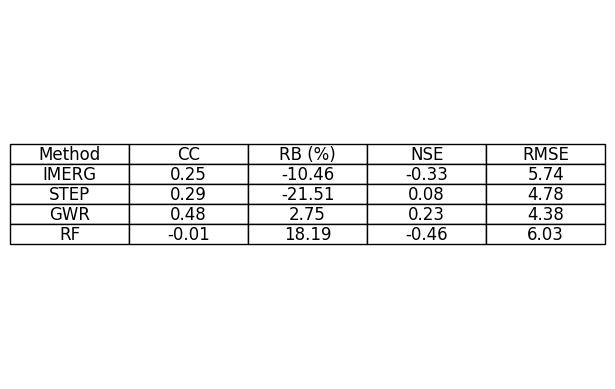

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Dữ liệu kết quả
results = pd.DataFrame({
    'Method': ['IMERG', 'STEP', 'GWR', 'RF'],
    'CC': [cc_imerg, cc_step, cc_gwr, cc_rf ],
    'RB (%)': [rb_imerg, rb_step, rb_gwr, rb_rf],
    'NSE': [nse_imerg, nse_step, nse_gwr, nse_rf],
    'RMSE': [rmse_imerg, rmse_step, rmse_gwr, rmse_rf ]
})

# Làm tròn các giá trị đến 2 chữ số thập phân
results[['RB (%)', 'CC', 'RMSE', 'NSE']] = results[['RB (%)', 'CC', 'RMSE', 'NSE']].round(2)

# Tạo bảng
fig, ax = plt.subplots()

# Ẩn trục
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Tạo bảng từ DataFrame đã làm tròn
table = ax.table(cellText=results.values, colLabels=results.columns, cellLoc='center', loc='center')

# Định dạng bảng
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Điều chỉnh kích thước bảng

# Hiển thị bảng
plt.show()

###Biểu đồ phân tán

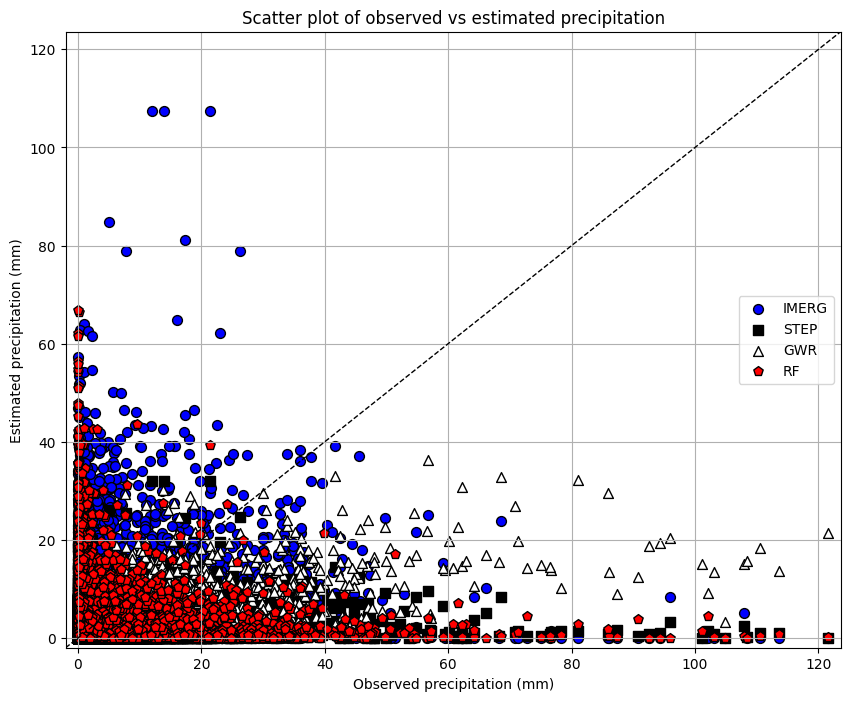

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate scatter plot
def plot_scatter(observed, predicted_dict, methods):
    plt.figure(figsize=(10, 8))

    # Loop through each method and plot
    markers = ['o', 's', '^', 'p']
    colors = ['blue', 'black', 'white','red']
    for i, method in enumerate(methods):
        plt.scatter(observed, predicted_dict[method], label=method,
                    edgecolors='k', facecolors=colors[i], marker=markers[i], s=50)

    # Plot 1:1 line
    max_val = max(observed.max(), max([pred.max() for pred in predicted_dict.values()])) + 2
    min_val = -2
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)

    # Add labels and title
    plt.xlabel('Observed precipitation (mm)')
    plt.ylabel('Estimated precipitation (mm)')
    plt.title('Scatter plot of observed vs estimated precipitation')
    plt.legend()
    plt.grid(True)
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)

    plt.show()

# Dictionary of predicted values
predicted_dict = {
    'IMERG': imerg,
    'STEP': step,
    'GWR': gwr,
    'RF': rf
}

# List of methods
methods = ['IMERG', 'STEP', 'GWR', 'RF']

# Call the function to plot scatter
plot_scatter(obs, predicted_dict, methods)

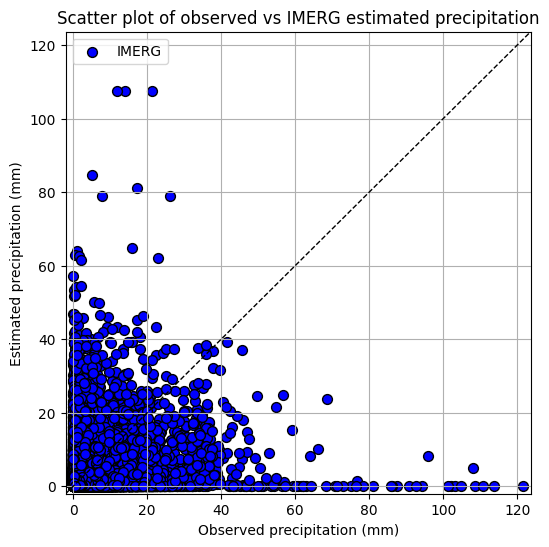

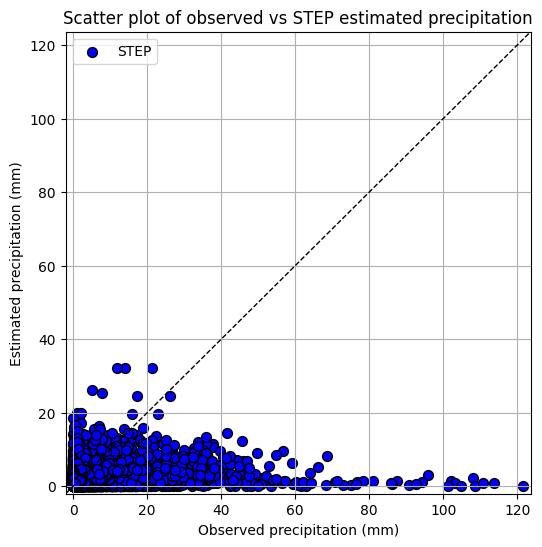

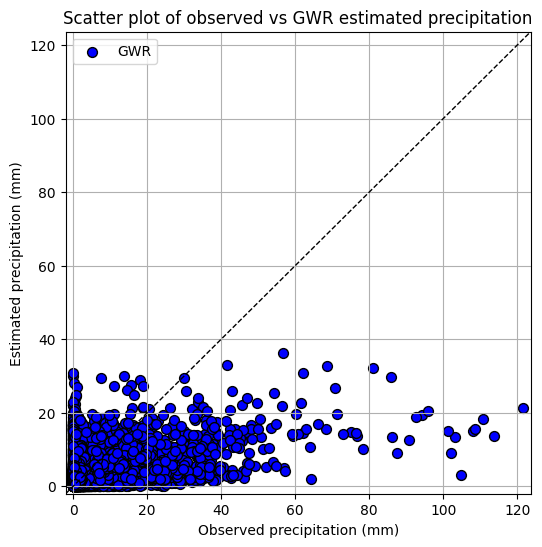

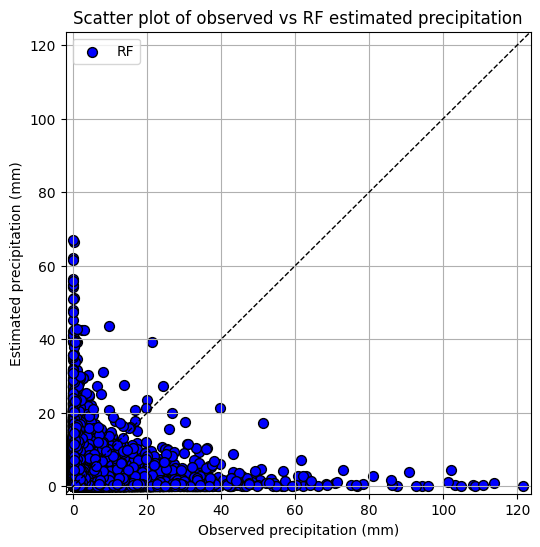

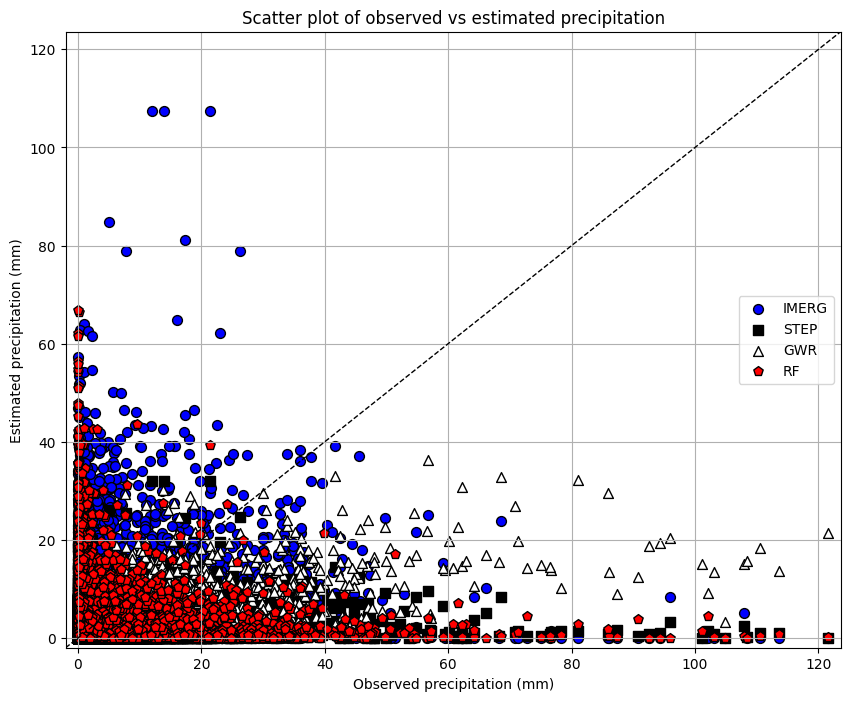

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to generate scatter plot
def plot_scatter(observed, predicted_dict, methods):
    plt.figure(figsize=(10, 8))

    # Loop through each method and plot
    markers = ['o', 's', '^', 'p']
    colors = ['blue', 'black', 'white', 'red']
    for i, method in enumerate(methods):
        plt.scatter(observed, predicted_dict[method], label=method,
                    edgecolors='k', facecolors=colors[i], marker=markers[i], s=50)

    # Plot 1:1 line
    max_val = max(observed.max(), max([pred.max() for pred in predicted_dict.values()])) + 2
    min_val = -2
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)

    # Add labels and title
    plt.xlabel('Observed precipitation (mm)')
    plt.ylabel('Estimated precipitation (mm)')
    plt.title('Scatter plot of observed vs estimated precipitation')
    plt.legend()
    plt.grid(True)
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)

    plt.show()

# Function to evaluate and plot comparison
def evaluate_methods(observed, predicted_dict, methods):
    results = {}

    for method in methods:
        predicted = predicted_dict[method]

        # Plot scatter plot for this method
        plt.figure(figsize=(6, 6))
        plt.scatter(observed, predicted, label=method, edgecolors='k', facecolors='blue', marker='o', s=50)
        max_val = max(observed.max(), predicted.max()) + 2
        min_val = min(observed.min(), predicted.min()) - 2
        plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)
        plt.xlabel('Observed precipitation (mm)')
        plt.ylabel('Estimated precipitation (mm)')
        plt.title(f'Scatter plot of observed vs {method} estimated precipitation')
        plt.legend()
        plt.grid(True)
        plt.xlim(min_val, max_val)
        plt.ylim(min_val, max_val)
        plt.show()

    return results

# Dictionary of predicted values (replace with your actual data)
predicted_dict = {
    'IMERG': imerg,
    'STEP': step,
    'GWR': gwr,
    'RF': rf
}

# List of methods
methods = ['IMERG', 'STEP', 'GWR', 'RF']

# Evaluate methods
results = evaluate_methods(obs, predicted_dict, methods)

# Plot all scatter plots together
plot_scatter(obs, predicted_dict, methods)


###Biểu đồ boxplot

In [21]:
df = df_combined.copy()
# Chuyển đổi cột 'name' thành định dạng ngày
df['name'] = pd.to_datetime(df['name'], format='%Y%m%d%H%M%S')

# Tạo một cột chỉ chứa ngày
df['date'] = df['name'].dt.date

# Hàm tính toán hệ số tương quan Pearson
def calculate_cc(group):
    return {
        'IMERG-CC': group['Imerg'].corr(group['AWS']),
        'STEP-CC': group['STEP'].corr(group['AWS']),
        'GWR-CC': group['GWR'].corr(group['AWS']),
        'RF-CC': group['RF'].corr(group['AWS'])
    }

# Áp dụng hàm tính toán hệ số tương quan cho từng nhóm ngày
correlation_df = df.groupby('date').apply(calculate_cc).reset_index()

# Mở rộng dictionary thành các cột riêng biệt
correlation_df = pd.json_normalize(correlation_df.to_dict(orient='records'))

# Đổi tên cột 'date' thành 'name' để phù hợp với yêu cầu và loại bỏ tiền tố '0.'
correlation_df.columns = correlation_df.columns.str.replace('0.', '')

print(correlation_df)

          date  IMERG-CC   STEP-CC    GWR-CC     RF-CC
0   2019-04-01  0.221250  0.255896  0.552263 -0.012694
1   2019-04-02 -0.008765  0.084197  0.610295  0.058060
2   2019-04-03  0.156931  0.152696  0.553080 -0.023379
3   2019-04-04  0.288115  0.331827  0.442372 -0.060808
4   2019-04-05  0.256190  0.128660  0.210377  0.005496
..         ...       ...       ...       ...       ...
56  2019-10-27  0.384784  0.349072  0.202068 -0.022914
57  2019-10-28  0.141439  0.241444  0.279232  0.027258
58  2019-10-29 -0.019389  0.411277  0.445132 -0.052827
59  2019-10-30 -0.000222  0.665986  0.463374 -0.057905
60  2019-10-31  0.258600  0.403433  0.562192  0.006439

[61 rows x 5 columns]


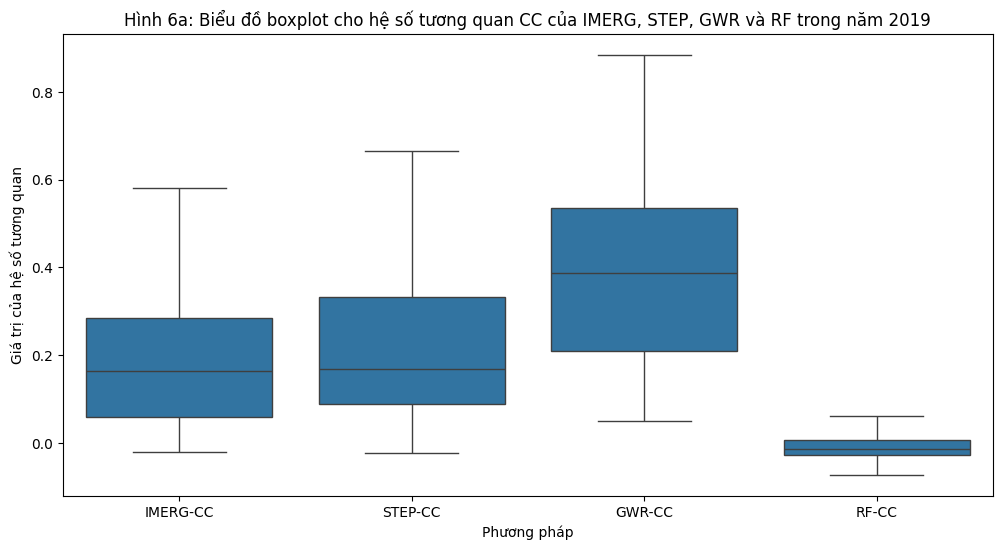

In [22]:
import seaborn as sns
correlation_df_long = pd.melt(correlation_df, id_vars=['date'], value_vars=['IMERG-CC', 'STEP-CC', 'GWR-CC', 'RF-CC'],
                              var_name='Product', value_name='Correlation')

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Correlation', data=correlation_df_long, showfliers=False)
plt.title('Hình 6a: Biểu đồ boxplot cho hệ số tương quan CC của IMERG, STEP, GWR và RF trong năm 2019')
plt.xlabel('Phương pháp')
plt.ylabel('Giá trị của hệ số tương quan')
plt.show()

In [23]:
# Hàm tính toán Relative Bias (RB)
def calculate_rb(group):
    return {
        'IMERG-RB': (group['Imerg'] - group['AWS']).sum() / group['AWS'].sum() * 100,
        'STEP-RB': (group['STEP'] - group['AWS']).sum() / group['AWS'].sum() * 100,
        'GWR-RB': (group['GWR'] - group['AWS']).sum() / group['AWS'].sum() * 100,
        'RF-RB': (group['RF'] - group['AWS']).sum() / group['AWS'].sum() * 100
    }

# Hàm tính toán Root Mean Square Error (RMSE)
def calculate_rmse(group):
    return {
        'IMERG-RMSE': np.sqrt(((group['Imerg'] - group['AWS']) ** 2).mean()),
        'STEP-RMSE': np.sqrt(((group['STEP'] - group['AWS']) ** 2).mean()),
        'GWR-RMSE': np.sqrt(((group['GWR'] - group['AWS']) ** 2).mean()),
        'RF-RMSE': np.sqrt(((group['RF'] - group['AWS']) ** 2).mean())
    }

# Hàm tính toán Nash-Sutcliffe Efficiency (NSE)
def calculate_nse(group):
    mean_aws = group['AWS'].mean()
    return {
        'IMERG-NSE': 1 - ((group['Imerg'] - group['AWS']) ** 2).sum() / ((group['AWS'] - mean_aws) ** 2).sum(),
        'STEP-NSE': 1 - ((group['STEP'] - group['AWS']) ** 2).sum() / ((group['AWS'] - mean_aws) ** 2).sum(),
        'GWR-NSE': 1 - ((group['GWR'] - group['AWS']) ** 2).sum() / ((group['AWS'] - mean_aws) ** 2).sum(),
        'RF-NSE': 1 - ((group['RF'] - group['AWS']) ** 2).sum() / ((group['AWS'] - mean_aws) ** 2).sum()
    }

# Tạo DataFrame cho RB
rb_df = df.groupby('date').apply(calculate_rb).reset_index()
rb_df = pd.json_normalize(rb_df.to_dict(orient='records'))
rb_df.columns = rb_df.columns.str.replace('0.', '')
rb_df.rename(columns={'date': 'name'}, inplace=True)

# Tạo DataFrame cho RMSE
rmse_df = df.groupby('date').apply(calculate_rmse).reset_index()
rmse_df = pd.json_normalize(rmse_df.to_dict(orient='records'))
rmse_df.columns = rmse_df.columns.str.replace('0.', '')
rmse_df.rename(columns={'date': 'name'}, inplace=True)

# Tạo DataFrame cho NSE
nse_df = df.groupby('date').apply(calculate_nse).reset_index()
nse_df = pd.json_normalize(nse_df.to_dict(orient='records'))
nse_df.columns = nse_df.columns.str.replace('0.', '')
nse_df.rename(columns={'date': 'name'}, inplace=True)

print(rb_df)
print(rmse_df)
print(nse_df)

          name   IMERG-RB     STEP-RB      GWR-RB        RF-RB
0   2019-04-01 -50.510940  -55.991240  -40.088655   -41.519169
1   2019-04-02 -97.317807  -59.144849   73.616344   302.900161
2   2019-04-03  -8.170389  -43.186798  -19.195179     2.368217
3   2019-04-04 -46.623162  -62.358335  -45.552647   -18.588693
4   2019-04-05  13.893746  -27.840160   83.978726   216.909305
..         ...        ...         ...         ...          ...
56  2019-10-27 -85.912231  -15.275645   51.165901   194.107182
57  2019-10-28 -93.930898  -36.580454    6.982178    43.844565
58  2019-10-29 -87.965475  -34.616062  417.842595  1936.278737
59  2019-10-30   1.393880  131.766604  643.715842  3510.492707
60  2019-10-31  -2.313228   33.869343   64.294302    27.519187

[61 rows x 5 columns]
          name  IMERG-RMSE  STEP-RMSE  GWR-RMSE   RF-RMSE
0   2019-04-01    8.658297   8.557660  7.803907  9.273358
1   2019-04-02    3.242540   3.212104  2.568740  4.424373
2   2019-04-03    8.434875   7.441100  6.456433

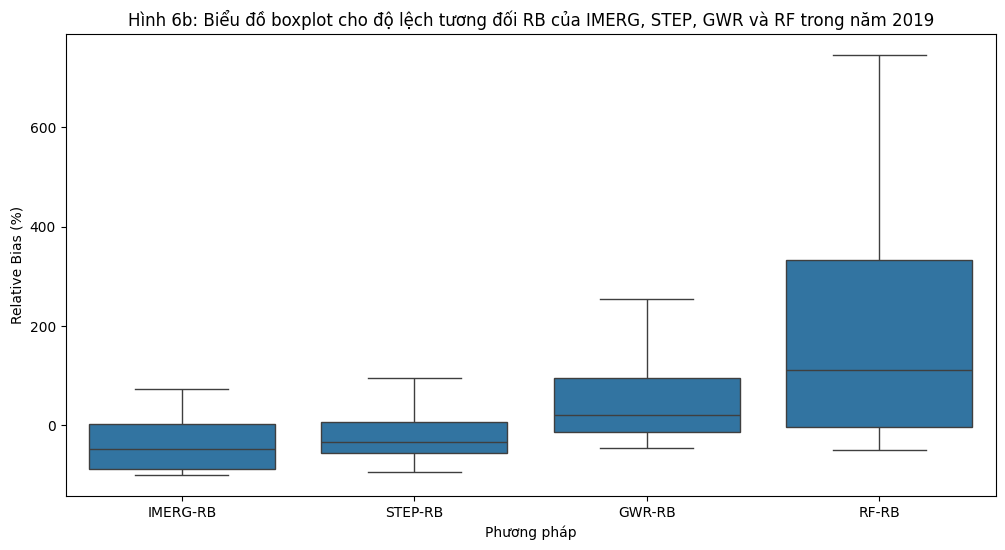

In [24]:
rb_df_long = pd.melt(rb_df, id_vars=['name'], value_vars=['IMERG-RB', 'STEP-RB', 'GWR-RB', 'RF-RB'],
                     var_name='Product', value_name='Relative Bias')

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Relative Bias', data=rb_df_long, showfliers=False)
plt.title('Hình 6b: Biểu đồ boxplot cho độ lệch tương đối RB của IMERG, STEP, GWR và RF trong năm 2019')
plt.xlabel('Phương pháp')
plt.ylabel('Relative Bias (%)')
plt.show()

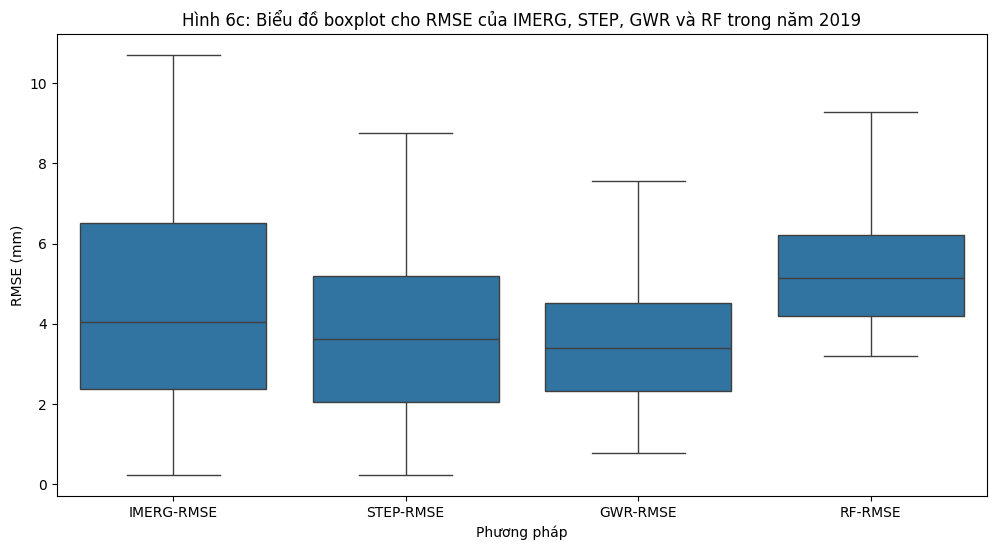

In [25]:
rmse_df_long = pd.melt(rmse_df, id_vars=['name'], value_vars=['IMERG-RMSE', 'STEP-RMSE', 'GWR-RMSE', 'RF-RMSE'],
                       var_name='Product', value_name='RMSE')

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='RMSE', data=rmse_df_long, showfliers=False)
plt.title('Hình 6c: Biểu đồ boxplot cho RMSE của IMERG, STEP, GWR và RF trong năm 2019')
plt.xlabel('Phương pháp')
plt.ylabel('RMSE (mm)')
plt.show()

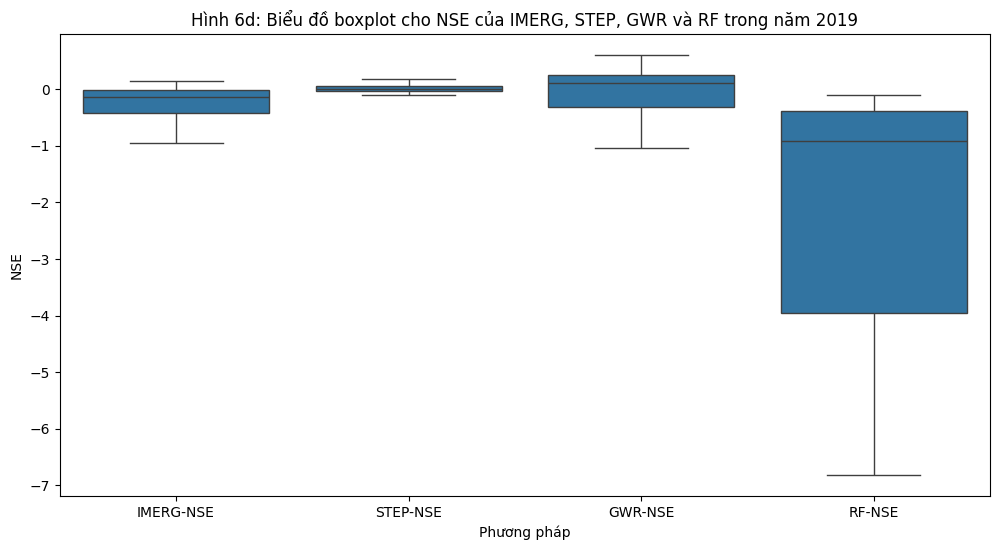

In [26]:
nse_df_long = pd.melt(nse_df, id_vars=['name'], value_vars=['IMERG-NSE', 'STEP-NSE', 'GWR-NSE', 'RF-NSE'],
                      var_name='Product', value_name='NSE')

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='NSE', data=nse_df_long, showfliers=False)
plt.title('Hình 6d: Biểu đồ boxplot cho NSE của IMERG, STEP, GWR và RF trong năm 2019')
plt.xlabel('Phương pháp')
plt.ylabel('NSE')
plt.show()

##Evaluation at Different Time Scales

##Phân tích tác động độ cao

In [37]:
new_df = df_combined.copy()


###Thống kê giá trị của cột DEM

In [38]:
# Tạo numpy array từ cột 'DEM'
dem_array = new_df['DEM'].values

# In ra numpy array
print(dem_array)

unique_values = np.unique(dem_array)
sorted_unique_values = np.sort(unique_values)

print("Các giá trị riêng biệt đã sắp xếp từ thấp đến cao:")
print(sorted_unique_values)

[104 111  11 ...   8  12 306]
Các giá trị riêng biệt đã sắp xếp từ thấp đến cao:
[   0    1    3    6    7    8    9   10   11   12   13   14   15   16
   17   18   19   20   21   23   25   26   27   28   29   30   31   32
   35   37   39   41   42   44   46   47   48   51   52   53   55   56
   59   60   61   62   65   67   69   71   72   75   76   80   81   82
   83   85   86   87   89   91   92   94   97  103  104  107  110  111
  112  115  116  117  120  121  125  126  137  138  142  145  146  149
  156  161  162  164  175  184  193  202  203  221  223  224  226  230
  231  235  241  246  247  250  251  253  258  259  260  261  262  269
  270  285  297  301  302  304  306  310  316  321  323  331  332  340
  342  347  348  350  354  355  356  357  359  363  368  369  372  377
  379  385  387  397  408  433  442  444  449  454  457  458  459  460
  463  470  482  485  495  499  500  502  505  544  564  577  591  641
  658  693  720  781  789  805  814  858  887  906  944  954  961 1

In [39]:
# Lọc và cập nhật giá trị trong cột 'DEM'
new_df.loc[new_df['DEM'] == 32767, 'DEM'] = 0

# In ra DataFrame sau khi đã được cập nhật
print(new_df)

                 name  Row  Column   AWS     Imerg  DEM      STEP       GWR  \
0      20190401000000    7     115  19.0  0.237974  104  1.681039  3.128090   
1      20190401000000   70     114   0.0  0.000000  111  0.000000  1.714085   
2      20190401000000   57     115   0.0  0.000000   11  0.989582  0.000000   
3      20190401000000   51      96   0.0  0.000000  112  0.000000  0.574374   
4      20190401000000   36     109   0.0  0.000000  302  1.733531  0.683617   
...               ...  ...     ...   ...       ...  ...       ...       ...   
39995  20191031230000   12     119   1.0  0.286803   20  2.063154  2.388714   
39996  20191031230000   12     116   0.4  0.000000   80  1.978540  2.535230   
39997  20191031230000   11     124   0.2  0.780623    8  2.152449  2.831382   
39998  20191031230000    3     115   1.8  0.380000   12  1.829733  2.485089   
39999  20191031230000   23     101   0.6  0.000000  306  0.857034  0.761000   

             RF  
0      0.316333  
1      0.045000

In [40]:
# Tạo numpy array từ cột 'DEM'
dem_array = new_df['DEM'].values

# In ra numpy array
print(dem_array)

[104 111  11 ...   8  12 306]


In [41]:
import numpy as np

unique_values = np.unique(dem_array)
sorted_unique_values = np.sort(unique_values)

print("Các giá trị riêng biệt đã sắp xếp từ thấp đến cao:")
print(sorted_unique_values)

Các giá trị riêng biệt đã sắp xếp từ thấp đến cao:
[   0    1    3    6    7    8    9   10   11   12   13   14   15   16
   17   18   19   20   21   23   25   26   27   28   29   30   31   32
   35   37   39   41   42   44   46   47   48   51   52   53   55   56
   59   60   61   62   65   67   69   71   72   75   76   80   81   82
   83   85   86   87   89   91   92   94   97  103  104  107  110  111
  112  115  116  117  120  121  125  126  137  138  142  145  146  149
  156  161  162  164  175  184  193  202  203  221  223  224  226  230
  231  235  241  246  247  250  251  253  258  259  260  261  262  269
  270  285  297  301  302  304  306  310  316  321  323  331  332  340
  342  347  348  350  354  355  356  357  359  363  368  369  372  377
  379  385  387  397  408  433  442  444  449  454  457  458  459  460
  463  470  482  485  495  499  500  502  505  544  564  577  591  641
  658  693  720  781  789  805  814  858  887  906  944  954  961 1013
 1025 1034 1073 1105 1204 

###Tách thành các dataframe dựa trên độ cao của cột DEM

In [42]:
# Tạo DataFrame df_500 chứa các dòng có giá trị cột DEM < 500
df_500 = new_df[new_df['DEM'] < 500]

# Tạo DataFrame df_500to1000 chứa các dòng có giá trị cột DEM >= 500 và < 1000
df_500to1000 = new_df[(new_df['DEM'] >= 500) & (new_df['DEM'] < 1000)]

# Tạo DataFrame df_1000to1500 chứa các dòng có giá trị cột DEM >= 1000 và < 1500
df_1000to1500 = new_df[(new_df['DEM'] >= 1000) & (new_df['DEM'] < 1500)]

# Tạo DataFrame df_1500to2000 chứa các dòng có giá trị cột DEM >= 1500 và < 2000
df_1500to2000 = new_df[(new_df['DEM'] >= 1500) & (new_df['DEM'] < 2000)]

# Tạo DataFrame df_2000 chứa các dòng có giá trị cột DEM > 2000
df_2000 = new_df[new_df['DEM'] > 2000]

# df_500 = df_500[df_500['AWS'] > 0]
# df_500to1000 = df_500to1000[df_500to1000['AWS'] > 0]
# df_1000to1500 = df_1000to1500[df_1000to1500['AWS'] > 0]
# df_1500to2000 = df_1500to2000[df_1500to2000['AWS'] > 0]
# df_2000 = df_2000[df_2000['AWS'] > 0]

# In ra ba DataFrame mới
print("DataFrame df_500:")
print(df_500)
print("\nDataFrame df_500to1000:")
print(df_500to1000)
print("\nDataFrame df_1000to1500:")
print(df_1000to1500)
print("\nDataFrame df_1500to2000:")
print(df_1500to2000)
print("\nDataFrame df_2000:")
print(df_2000)

DataFrame df_500:
                 name  Row  Column   AWS     Imerg  DEM      STEP       GWR  \
0      20190401000000    7     115  19.0  0.237974  104  1.681039  3.128090   
1      20190401000000   70     114   0.0  0.000000  111  0.000000  1.714085   
2      20190401000000   57     115   0.0  0.000000   11  0.989582  0.000000   
3      20190401000000   51      96   0.0  0.000000  112  0.000000  0.574374   
4      20190401000000   36     109   0.0  0.000000  302  1.733531  0.683617   
...               ...  ...     ...   ...       ...  ...       ...       ...   
39995  20191031230000   12     119   1.0  0.286803   20  2.063154  2.388714   
39996  20191031230000   12     116   0.4  0.000000   80  1.978540  2.535230   
39997  20191031230000   11     124   0.2  0.780623    8  2.152449  2.831382   
39998  20191031230000    3     115   1.8  0.380000   12  1.829733  2.485089   
39999  20191031230000   23     101   0.6  0.000000  306  0.857034  0.761000   

             RF  
0      0.316333

Thống kê số trạm khác nhau ở mỗi độ cao

In [43]:
# Đếm số lượng dòng có giá trị cặp (Row, Column) khác nhau
unique_row_column_count = df_500.drop_duplicates(subset=["Row", "Column"]).shape[0]

print("Số lượng trạm ở độ cao nhỏ hơn 500m:", unique_row_column_count)

Số lượng trạm ở độ cao nhỏ hơn 500m: 283


In [44]:
# Đếm số lượng dòng có giá trị cặp (Row, Column) khác nhau
unique_row_column_count = df_500to1000.drop_duplicates(subset=["Row", "Column"]).shape[0]

print("Số lượng trạm ở độ cao từ 500m đến 1000m:", unique_row_column_count)

Số lượng trạm ở độ cao từ 500m đến 1000m: 21


In [45]:
# Đếm số lượng dòng có giá trị cặp (Row, Column) khác nhau
unique_row_column_count = df_1000to1500.drop_duplicates(subset=["Row", "Column"]).shape[0]

print("Số lượng trạm ở độ cao từ 1000m đến 1500m:", unique_row_column_count)

Số lượng trạm ở độ cao từ 1000m đến 1500m: 7


###Tính bảng giá trị CC, RB, NSE, RMSE theo độ cao

In [46]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_squared_error

# Tính toán các giá trị CC, RB, NSE, RMSE
def calculate_metrics(df):
    metrics = {}
    for column in ['Imerg', 'STEP', 'GWR', 'RF']:
        obs = df['AWS'].values
        pred = df[column].values
        # CC
        cc = np.corrcoef(obs.flatten(), pred.flatten())[0][1]
        # RB: Relative Bias
        rb = np.sum(pred - obs) / np.sum(obs) * 100
        # NSE: Nash-Sutcliffe Efficiency
        nse = 1 - np.sum((pred - obs) ** 2) / np.sum((obs - np.mean(obs)) ** 2)
        # RMSE: Root Mean Squared Error
        rmse = np.sqrt(mean_squared_error(obs, pred))

        metrics[column] = {'CC': round(cc, 2), 'RB': round(rb, 2), 'NSE': round(nse, 2), 'RMSE': round(rmse, 2)}
    return pd.DataFrame.from_dict(metrics).T


# Tạo bảng thống kê cho từng DataFrame
df_500_stats = calculate_metrics(df_500)
df_500to1000_stats = calculate_metrics(df_500to1000)
df_1000to1500_stats = calculate_metrics(df_1000to1500)

# Hiển thị bảng thống kê
print("Bảng thống kê cho trạm có độ cao nhỏ hơn 500m:")
print(df_500_stats)
print("\nBảng thống kê cho trạm có độ cao từ 500 đến 1000m:")
print(df_500to1000_stats)
print("\nBảng thống kê cho trạm có độ cao từ 1000 đến 1500m:")
print(df_1000to1500_stats)


Bảng thống kê cho trạm có độ cao nhỏ hơn 500m:
         CC     RB   NSE  RMSE
Imerg  0.25  -9.45 -0.33  5.90
STEP   0.29 -20.37  0.08  4.91
GWR    0.48   2.68  0.23  4.49
RF    -0.01  14.88 -0.45  6.15

Bảng thống kê cho trạm có độ cao từ 500 đến 1000m:
         CC     RB   NSE  RMSE
Imerg  0.30 -30.41 -0.21  3.36
STEP   0.31 -40.43  0.08  2.94
GWR    0.43   4.33  0.18  2.77
RF     0.03  79.07 -1.04  4.37

Bảng thống kê cho trạm có độ cao từ 1000 đến 1500m:
         CC      RB   NSE  RMSE
Imerg  0.31  -33.25 -0.27  2.86
STEP   0.35  -59.37  0.08  2.44
GWR    0.46    4.50  0.21  2.26
RF    -0.04  108.17 -1.44  3.97
